#Reddit Scraping
PRAW 라이브러리를 사용하여 Reddit에서 게시물을 수집하고, 사용자의 상호작용(업보트 수, 댓글 수, 제출 시간 등)에 대한 기본적인 분석을 수행합니다.

#단계
1. 환경 설정(praw): praw를 설치하고 설정하여  Reddit API를 사용할 수 있도록 준비합니다.

2. 스크래핑 작업: DataScience 서브레딧을 선택합니다.

선택한 서브레딧에서 상위 50개의 게시물을 가져오고, 아래의 정보를 수집합니다.

게시물 제목 / 작성자 / 업보트 수 / 댓글 수 / 제출 날짜 / 게시물 URL

3. 기본 분석 작업

가장 많은 업보트 수를 받은 게시물의 제목과 URL을 찾고 출력합니다.

가장 많은 댓글을 받은 게시물의 제목과 URL을 찾고 출력합니다.

모든 게시물에 대한 업보트와 댓글의 평균 값을 계산합니다.

업보트의 분포를 히스토그램으로 시각화합니다.



In [ ]:
# !pip install praw
!pip install praw

In [ ]:
import praw

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/MyDrive/'Colab Notebooks'/Reddit*

'drive/MyDrive/Colab Notebooks/Reddit_client_secrets.json'


In [ ]:
json_file = '/content/drive/MyDrive/Colab Notebooks/Reddit_client_secrets.json'

In [ ]:
import json
with open(json_file, "r" ) as fp:
    data = json.load( fp )

client_id = data['client_id']
client_secret = data['client_secret']
user_agent = data['user_agent']

In [ ]:
# create a reddit instance
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)

여기까지 praw를 설치하고 설정하여 Reddit API를 사용할 수 있도록 준비했습니다.

이제는 스크래핑 작업을 수행하겠습니다.

In [ ]:
# get 50 hot posts from the DataScience subreddit
hot_posts = reddit.subreddit('DataScience').hot(limit=50)

In [ ]:
# Create separate lists for each attribute
titles = []
authors = []
ups = []
num_comments = []
created_utc = []
urls = []

In [ ]:
# Collect post information
for post in hot_posts:
    titles.append(post.title)               # Title
    authors.append(post.author)              # Author
    ups.append(post.ups)                     # Upvote count
    num_comments.append(post.num_comments)    # Comment count
    created_utc.append(post.created_utc)     # Submission date (UTC)
    urls.append(post.url)                    # Post URL

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [ ]:
# Creating a DataFrame
import pandas as pd
posts_df = pd.DataFrame({
    'Title': titles,
    'Author': authors,
    'Ups': ups,
    'Num Comments': num_comments,
    'Created (UTC)': created_utc,
    'URL': urls
})

In [ ]:
# Displaying the DataFrame
print(posts_df)

                                                Title                Author  \
0   Weekly Entering & Transitioning - Thread 30 Se...         AutoModerator   
1   Unpaid intern position in Canada. Expecting th...    lostmillenial97531   
2             A new open source tool for data science                 breck   
3   Colleague codes in Google Docs and Sheets and ...                  YIRS   
4   How do you diplomatically convince people with...               sowenga   
5                   Recommender systems ML resources      Amazing_Alarm6130   
6                                ryp: R inside Python           ryp_package   
7   Advanced LLM parsing is the key to advanced AI...       Daniel-Warfield   
8         Sales forecasting, need to improve accuracy               bernful   
9            Ways of volunteering to teach stats? [Q]             AdFew4357   
10    Feeling Stuck in My Current Data Scientist Role     Plastic-Mind-1291   
11  Even with good verbal feedback at screenings I..

상위 50개의 게시물을 통해 얻은 정보를 데이터프레임으로 저장했습니다.

이제는 이를 바탕으로 기본 분석 작업을 수행하겠습니다.

가장 많은 업보트 수를 받은 게시물:
제목: Feeling like I do not deserve the new data scientist position
URL: https://www.reddit.com/r/datascience/comments/1fphnbp/feeling_like_i_do_not_deserve_the_new_data/

가장 많은 댓글을 받은 게시물:
제목: Feeling like I do not deserve the new data scientist position
URL: https://www.reddit.com/r/datascience/comments/1fphnbp/feeling_like_i_do_not_deserve_the_new_data/

모든 게시물에 대한 평균:
업보트 평균: 72.44
댓글 평균: 39.00


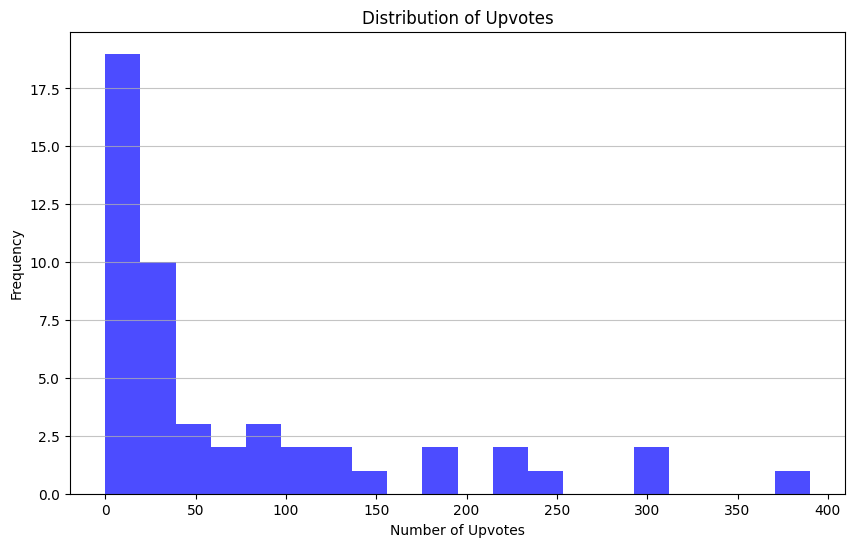

In [ ]:
import matplotlib.pyplot as plt

# 1. Find the post with the most upvotes
top_upvote_post = posts_df.loc[posts_df['Ups'].idxmax()]
print("가장 많은 업보트 수를 받은 게시물:")
print(f"제목: {top_upvote_post['Title']}")
print(f"URL: {top_upvote_post['URL']}")

# 2. Find the post with the most comments
top_comment_post = posts_df.loc[posts_df['Num Comments'].idxmax()]
print("\n가장 많은 댓글을 받은 게시물:")
print(f"제목: {top_comment_post['Title']}")
print(f"URL: {top_comment_post['URL']}")

# 3. Calculate the average number of upvotes and comments for all posts
average_ups = posts_df['Ups'].mean()
average_comments = posts_df['Num Comments'].mean()
print("\n모든 게시물에 대한 평균:")
print(f"업보트 평균: {average_ups:.2f}")
print(f"댓글 평균: {average_comments:.2f}")

# 4. Visualize the distribution of upvotes with a histogram
plt.figure(figsize=(10, 6))
plt.hist(posts_df['Ups'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Upvotes')
plt.xlabel('Number of Upvotes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

가장 많은 업보트 수를 받은 게시물의 제목과 URL을 찾고 출력

가장 많은 댓글을 받은 게시물의 제목과 URL을 찾고 출력

모든 게시물에 대한 업보트와 댓글의 평균 값을 계산

업보트의 분포를 히스토그램으로 시각화

위의 모든 과정이 수행되었음을 확인할 수 있었습니다.

#Web Scraping
'Books to Scrape'라는 웹사이트에서 BeautifulSoup과 requests 라이브러리를 사용하여 책과 관련된 데이터를 수집하고 분석합니다.

#단계
1. 환경 설정: BeautifulSoup과 requests 라이브러리를 설치하고 설정합니다.

2. 스크래핑 작업: 'Books to Scrape' 홈페이지에서 책의 데이터(책 제목 / 책 가격 / 재고 상태(예: "In Stock") / 별점(별로 표시된 평점))들을 수집합니다.

3. 데이터 분석 작업
홈페이지에 등록된 책이 몇 권인지 확인합니다.

책들의 평균 가격을 계산합니다.

재고가 있는 책이 몇 권인지 확인합니다.

별점이 5점인 책들을 모두 나열합니다.

각 책의 URL을 제목과 함께 출력합니다.

In [101]:
#BeautifulSoup과 requests 라이브러리를 설치
#!pip install requests beautifulsoup4

In [1]:
#라이브러리 가져오기
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [106]:
# 기본 URL 설정
base_url = 'http://books.toscrape.com/catalogue/page-{}.html'

# 데이터 수집 함수 정의
def scrape_books_data(page_num):
    url = base_url.format(page_num)  # 페이지 번호를 URL에 추가
    response = requests.get(url)  # 웹 페이지 요청
    soup = BeautifulSoup(response.text, 'html.parser')  # HTML 파싱

    books = []  # 책 정보를 저장할 리스트

    # 책 정보를 포함하는 모든 카드 선택
    for article in soup.select('article.product_pod'):
        title = article.h3.a['title']  # 책 제목
        price = article.select_one('p.price_color').text  # 가격
        stock = article.select_one('p.availability').text.strip()  # 재고 상태
        rating = article.p['class'][1]  # 별점 (class 속성에서 두 번째 클래스 사용)

        # 책 정보를 딕셔너리로 저장
        books.append({
            'title': title,
            'price': price,
            'stock': stock,
            'rating': rating
        })

    return books  # 수집한 책 정보 반환


우선 기본 URL 설정을 설정합니다.

데이터 수집 함수를 정의합니다. Scrpae_books_data 함수는 주어진 페이지 번호에 대한 책 정보를 수집합니다.

requests.get(url): 주어진 URL에 HTTP 요청을 보냅니다.

BeautifulSoup(response.text, 'html.parser'): 요청한 웹 페이지의 HTML을 파싱합니다.

soup.select('article.product_pod'): 책 정보를 포함하는 HTML 요소를 선택합니다.

각 책의 제목, 가격, 재고 상태 및 별점을 추출하여 딕셔너리로 저장한 후, 리스트에 추가합니다.

In [108]:
# 모든 페이지에서 데이터 수집
all_books = []  # 모든 책 정보를 저장할 리스트

# 첫 페이지를 가져와서 총 페이지 수 결정
first_page_response = requests.get(base_url.format(1))
first_page_soup = BeautifulSoup(first_page_response.text, 'html.parser')

# 총 페이지 수 계산 (페이지 네비게이션에서 확인)
last_page = int(first_page_soup.find('li', class_='current').text.split()[-1])  # 'Page 1 of 50'에서 '50' 추출

# 모든 페이지에서 책 정보 수집
for page_num in range(1, last_page + 1):
    books_data = scrape_books_data(page_num)
    all_books.extend(books_data)  # 수집한 책 정보를 전체 리스트에 추가

all_books 리스트를 생성하여 모든 책 정보를 저장할 수 있도록 합니다.

첫 번째 페이지의 HTML을 요청하여 총 페이지 수를 결정합니다.

- find('li', class_='current'): 현재 페이지 정보를 포함한 HTML 요소를 선택합니다.
- text.split()[-1]: 'Page 1 of 50'과 같은 문자열에서 '50'을 추출합니다.

For문을 통해 1부터 last_page까지의 모든 페이지 번호에 대해 scrape_books_data 함수를 호출하고, 수집한 책 정보를 all_books 리스트에 추가합니다.

In [109]:
# DataFrame 생성
books_df = pd.DataFrame(all_books)

# 전체 데이터 출력
print(books_df)

                                                 title    price     stock  \
0                                 A Light in the Attic  Â£51.77  In stock   
1                                   Tipping the Velvet  Â£53.74  In stock   
2                                           Soumission  Â£50.10  In stock   
3                                        Sharp Objects  Â£47.82  In stock   
4                Sapiens: A Brief History of Humankind  Â£54.23  In stock   
..                                                 ...      ...       ...   
995  Alice in Wonderland (Alice's Adventures in Won...  Â£55.53  In stock   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)  Â£57.06  In stock   
997  A Spy's Devotion (The Regency Spies of London #1)  Â£16.97  In stock   
998                1st to Die (Women's Murder Club #1)  Â£53.98  In stock   
999                 1,000 Places to See Before You Die  Â£26.08  In stock   

    rating  
0    Three  
1      One  
2      One  
3     Four  
4     Five

수집한 데이터를 Pandas 데이터프레임으로 변환하여 출력합니다.

In [111]:
# 가격 컬럼을 숫자로 변환 (현재 문자열로 되어 있음)
# 문자열의 특수 문자 제거 후 변환
books_df['price'] = books_df['price'].replace({'£': '', 'Â': '', '': ''}, regex=True).str.strip()  # 공백 제거
books_df['price'] = pd.to_numeric(books_df['price'], errors='coerce')  # 변환 중 오류가 발생한 값은 NaN으로 처리

# 평균 가격 계산
average_price = books_df['price'].mean()
print(f"책들의 평균 가격: £{average_price:.2f}")


책들의 평균 가격: £35.07


In [112]:
# 재고가 있는 책 수 계산
in_stock_count = books_df[books_df['stock'].str.contains('In stock')].shape[0]
print(f"재고가 있는 책의 수: {in_stock_count}권")

재고가 있는 책의 수: 1000권


In [116]:
# 별점이 5점인 책들 필터링
five_star_books = books_df[books_df['rating'] == 'Five']

# 별점이 5점인 책 개수 계산
five_star_count = five_star_books.shape[0]

# 결과 출력
print("별점이 5점인 책들:")
print(five_star_books[['title', 'price', 'stock']])
print(f"\n총 개수: {five_star_count}권")

별점이 5점인 책들:
                                                 title  price     stock
4                Sapiens: A Brief History of Humankind  54.23  In stock
12                                         Set Me Free  17.46  In stock
13   Scott Pilgrim's Precious Little Life (Scott Pi...  52.29  In stock
14                           Rip it Up and Start Again  35.02  In stock
23                          Chase Me (Paris Nights #2)  25.27  In stock
..                                                 ...    ...       ...
985                    Deep Under (Walker Security #1)  47.09  In stock
989                                       Bright Lines  39.07  In stock
993  Bleach, Vol. 1: Strawberry and the Soul Reaper...  34.65  In stock
997  A Spy's Devotion (The Regency Spies of London #1)  16.97  In stock
999                 1,000 Places to See Before You Die  26.08  In stock

[196 rows x 3 columns]

총 개수: 196권


In [114]:
# 각 책의 URL과 제목 출력
print("각 책의 URL과 제목:")
for index, row in books_df.iterrows():
    book_url = base_url.replace('catalogue/page-{}.html', f"catalogue/{row['title'].replace(' ', '-')}.html")  # URL 구성
    print(f"제목: {row['title']}, URL: {book_url}")

각 책의 URL과 제목:
제목: A Light in the Attic, URL: http://books.toscrape.com/catalogue/A-Light-in-the-Attic.html
제목: Tipping the Velvet, URL: http://books.toscrape.com/catalogue/Tipping-the-Velvet.html
제목: Soumission, URL: http://books.toscrape.com/catalogue/Soumission.html
제목: Sharp Objects, URL: http://books.toscrape.com/catalogue/Sharp-Objects.html
제목: Sapiens: A Brief History of Humankind, URL: http://books.toscrape.com/catalogue/Sapiens:-A-Brief-History-of-Humankind.html
제목: The Requiem Red, URL: http://books.toscrape.com/catalogue/The-Requiem-Red.html
제목: The Dirty Little Secrets of Getting Your Dream Job, URL: http://books.toscrape.com/catalogue/The-Dirty-Little-Secrets-of-Getting-Your-Dream-Job.html
제목: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull, URL: http://books.toscrape.com/catalogue/The-Coming-Woman:-A-Novel-Based-on-the-Life-of-the-Infamous-Feminist,-Victoria-Woodhull.html
제목: The Boys in the Boat: Nine Americans and Their Epic Quest 

다른 부분들은 출력할 때 문제가 없었지만.책들의 평균가격을 출력할 때 문제가 발생했습니다.

웹사이트에서 가격 정보를 가져올 때 'Â£'와 같은 특수 기호가 존재해 오류가 발생하였습니다.

그래서 'Â£'와 같은 문자를 제거한 후, 가격을 float로 변환할 수 있도록 코드를 수정했습니다.

이 과정을 통해 데이터를 수집한 후 전처리 하는 과정이 중요하다는 사실을 알았습니다.